In [31]:
import numpy as np
import matplotlib.pyplot as plt

def generate(n=1):
  x = np.random.randint(0,200,size=(365,))
  return (x*np.linspace(0,1,365)*n).astype(int)

A = np.array([ generate(n) for n in [0.2,1.0,3.0] ])
A[:,50]

array([ 2, 22,  6])

In [34]:
CA = np.cumsum(A,axis=1)
CA

array([[    0,     0,     0, ...,  3414,  3446,  3458],
       [    0,     0,     0, ..., 18156, 18178, 18213],
       [    0,     1,     4, ..., 54725, 55308, 55764]])

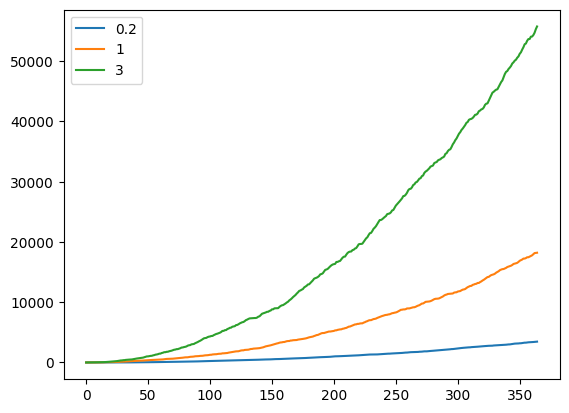

In [37]:
for i in range(3):
  plt.plot(CA[i],label=['0.2','1','3'][i])
plt.legend()

In [45]:
import pandas as pd

start_date = "Jan 1, 2020"
end_date = "Dec 30, 2020"
idx = pd.date_range(start_date, end_date)

msk = pd.Series(np.cumsum(generate()),index=idx)
msk

2020-01-01        0
2020-01-02        0
2020-01-03        0
2020-01-04        0
2020-01-05        0
              ...  
2020-12-26    16955
2020-12-27    17034
2020-12-28    17071
2020-12-29    17209
2020-12-30    17359
Freq: D, Length: 365, dtype: int64

<Axes: >

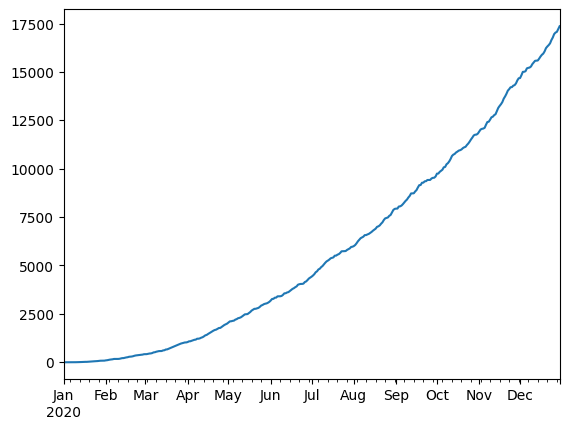

In [46]:
msk.plot()

In [48]:
idxw = pd.date_range(start_date,end_date,freq='W')
rec_msk = pd.Series(np.random.randint(0,300,size=(52,)),index=idxw)

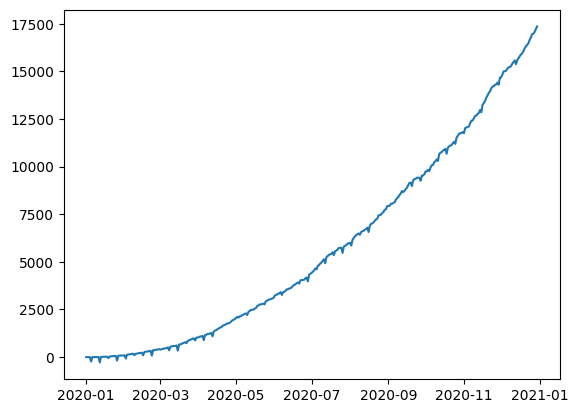

In [52]:
msk_total = msk.add(-rec_msk,fill_value=0)
plt.plot(msk_total)

<Axes: >

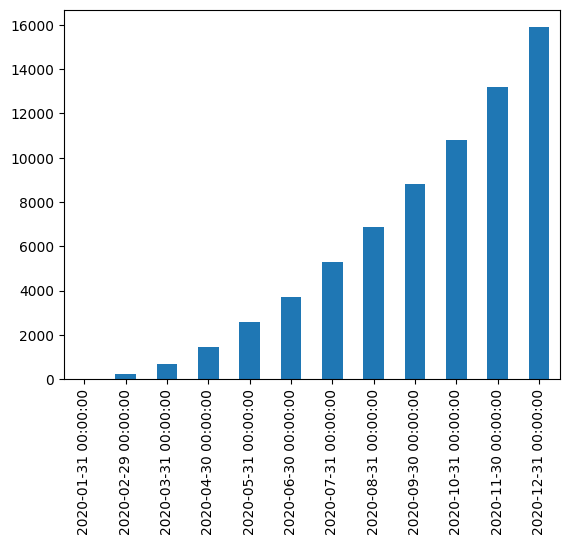

In [56]:
msk_total.resample('1M').mean().plot(kind='bar')

In [60]:
df = pd.DataFrame({ c : pd.Series(generate(n),index=idx) 
               for c,n in [('Moscow',1.0),('Tula',0.2), ('Beijing',3.0)] })
df

,Moscow,Tula,Beijing
2020-01-01,0,0,0
2020-01-02,0,0,1
2020-01-03,0,0,1
2020-01-04,0,0,2
2020-01-05,0,0,2
...,...,...,...
2020-12-26,84,6,415
2020-12-27,78,7,23
2020-12-28,150,0,310
2020-12-29,163,22,179


In [66]:
df['Total'] = df['Moscow']+df['Tula']+df['Beijing']
df

,Moscow,Tula,Beijing,Total
2020-01-01,0,0,0,0
2020-01-02,0,0,1,1
2020-01-03,0,0,1,1
2020-01-04,0,0,2,2
2020-01-05,0,0,2,2
...,...,...,...,...
2020-12-26,84,6,415,505
2020-12-27,78,7,23,108
2020-12-28,150,0,310,460
2020-12-29,163,22,179,364


<Axes: >

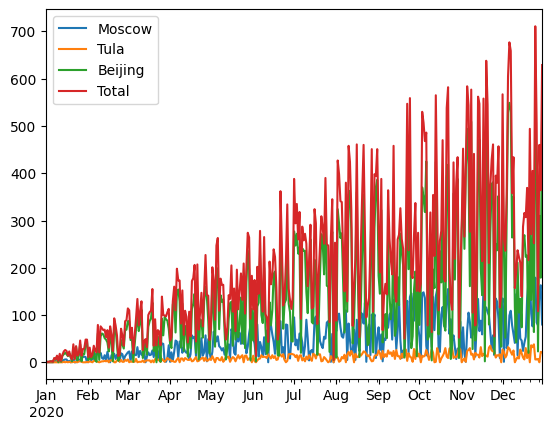

In [67]:
df.plot()

In [70]:
cols = df.columns
for x in cols:
  df['C'+x] = np.cumsum(df[x])

df

,Moscow,Tula,Beijing,Total,CMoscow,CTula,CBeijing,CTotal
2020-01-01,0,0,0,0,0,0,0,0
2020-01-02,0,0,1,1,0,0,1,1
2020-01-03,0,0,1,1,0,0,2,2
2020-01-04,0,0,2,2,0,0,4,4
2020-01-05,0,0,2,2,0,0,6,6
...,...,...,...,...,...,...,...,...
2020-12-26,84,6,415,505,17379,3521,49960,70860
2020-12-27,78,7,23,108,17457,3528,49983,70968
2020-12-28,150,0,310,460,17607,3528,50293,71428
2020-12-29,163,22,179,364,17770,3550,50472,71792


<Axes: >

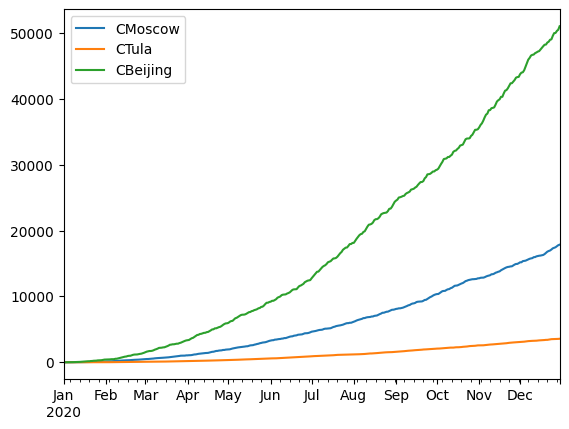

In [73]:
df[['CMoscow','CTula','CBeijing']].plot()

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [76]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet

infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
infected = pd.read_csv(infected_dataset_url)
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

In [83]:
infected[infected['Country/Region']=='Russia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
221,NaN,Russia,61.52401,105.318756,0,0,0,0,0,0,...,21960719,21974098,21988110,22002485,22016406,22029824,22040875,22051220,22063473,22075858


In [87]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

<ipython-input-87-73d3416b4255>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  infected = infected.groupby('Country/Region').sum()
<ipython-input-87-73d3416b4255>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recovered = recovered.groupby('Country/Region').sum()
<ipython-input-87-73d3416b4255>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths = deaths.groupby('Country/Region').sum()


In [89]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

<Axes: >

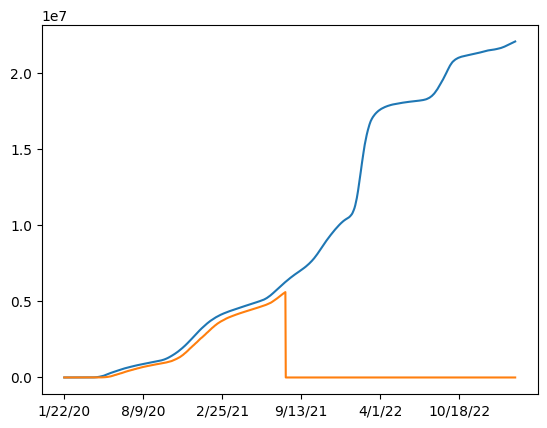

In [92]:
infected.loc['Russia'].plot()
recovered.loc['Russia'].plot()


In [105]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    df['ninfected'] = df['infected'].diff()
    df['Rt'] = df['ninfected'].rolling(window=8).apply(lambda x : x[4:].sum()/x[:4].sum())
    df = df[df.index < "2021-01-01"]
    return df

df = mkframe('Russia')
df

,infected,recovered,deaths,ninfected,Rt
2020-01-22,0,0,0,NaN,NaN
2020-01-23,0,0,0,0.0,NaN
2020-01-24,0,0,0,0.0,NaN
2020-01-25,0,0,0,0.0,NaN
2020-01-26,0,0,0,0.0,NaN
...,...,...,...,...,...
2020-12-27,3019972,2426094,54080,27849.0,1.019497
2020-12-28,3047335,2446412,54559,27363.0,0.991811
2020-12-29,3073923,2470783,55107,26588.0,0.976909
2020-12-30,3100018,2499465,55692,26095.0,0.948603


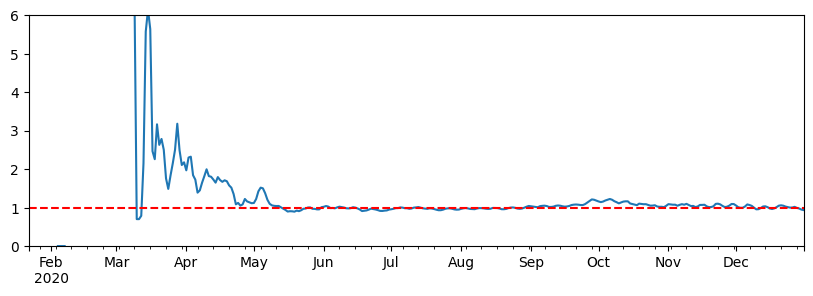

In [109]:
plt.figure(figsize=(10,3))
ax = df['Rt'].plot()
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')

In [117]:
ddf = pd.DataFrame({ c : mkframe(c)['Rt'].rolling(7).mean() for c in ['Russia','Italy','China']})
ddf

,Russia,Italy,China
2020-01-22,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN
...,...,...,...
2020-12-27,1.023788,0.956128,0.923871
2020-12-28,1.014226,0.944156,0.918468
2020-12-29,1.003936,0.910845,0.913419
2020-12-30,0.992908,0.902830,0.934126


<Figure size 1000x300 with 0 Axes>

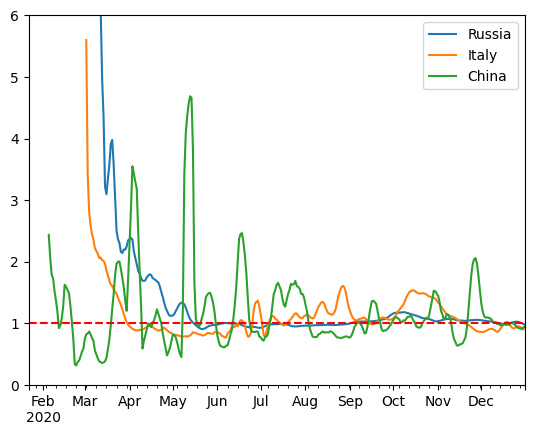

In [120]:
plt.figure(figsize=(10,3))
ax = ddf.plot()
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')

## Исследование статей о COVID-19

In [121]:
df = pd.read_csv('metadata.csv.zip')

<ipython-input-121-d6ec6f9907ac>:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata.csv.zip')


In [123]:
df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

In [125]:
df['publish_time'] = pd.to_datetime(df['publish_time'])

<Axes: >

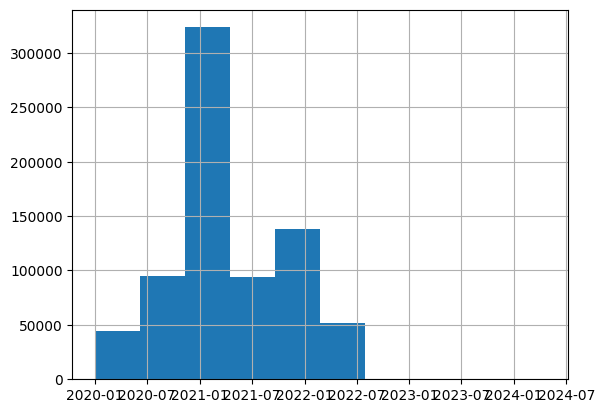

In [129]:
df[df['publish_time']>'2020-01-01']['publish_time'].hist()

In [130]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

In [135]:
for m in medications+diagnosis:
  print(f'Обрабатываю {m}')
  df[m] = df['abstract'].apply(lambda x : (' '+str(x)).lower().count(' '+m))

Обрабатываю hydroxychloroquine
Обрабатываю chloroquine
Обрабатываю tocilizumab
Обрабатываю remdesivir
Обрабатываю azithromycin
Обрабатываю lopinavir
Обрабатываю ritonavir
Обрабатываю dexamethasone
Обрабатываю heparin
Обрабатываю favipiravir
Обрабатываю methylprednisolone
Обрабатываю covid
Обрабатываю sars
Обрабатываю pneumonia
Обрабатываю infection
Обрабатываю diabetes
Обрабатываю coronavirus
Обрабатываю death


In [142]:
dfm = df[medications].sum().reset_index().rename(columns={ 'index' : 'medicine', 0 : 'count'})
dfm.sort_values('count',ascending=False)

,medicine,count
0,hydroxychloroquine,11346
3,remdesivir,10871
2,tocilizumab,7977
8,heparin,5592
1,chloroquine,5335
7,dexamethasone,5136
4,azithromycin,4384
5,lopinavir,4326
9,favipiravir,3423
10,methylprednisolone,2349


<Axes: xlabel='medicine'>

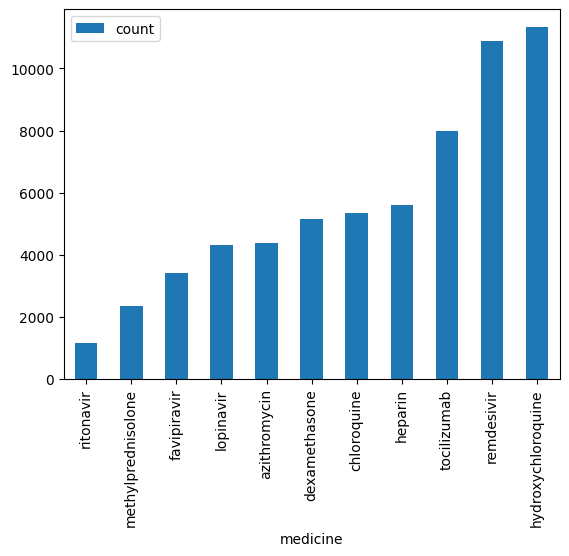

In [146]:
dfm.set_index('medicine').sort_values('count').plot(kind='bar')

In [159]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[ (dfm.index.year>=2020) & (dfm.index.year<=2022) ]
dfmt = dfm.groupby([dfm.index.year, dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3958         2008         1928   
             2                              0           19            0   
             3                             47           74            5   
             4                            192          242           51   
             5                            457          193          160   
             6                            387          154          245   
             7                            384          179          205   
             8                            316          119          176   
             9                            322          128          190   
             10                           318           99          211   
             11                           271           68          171   
             12                           259          108          228   
2021         1                           2505          904         2180   
             2                            166           69          184   
             3                            178           88          192   
             4                            203           73          130   
             5                            154           56          141   
             6                            145           30          146   
             7                            116           47           98   
             8                             84           47          127   
             9                             95           23          109   
             10                            66           25          144   
             11                           104           43          123   
             12                            69           19          163   
2022         1                            237          123          300   
             2                             99           27           68   
             3                             66           12          141   
             4                             56           22          121   
             5                             43           30           29   
             6                              0            0            0   
             7                              0            0            0   
             8                              0            0            0   
             9                              1            1            0   
             10                             0            0            0   
             11                             0            0            0   
             12                             0            0            0   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2317          1239       1552        403   
             2                      3             3         18         11   
             3                     29            12         52         16   
             4                    122            69        113         13   
             5                    212           129        134         41   
             6                    188           112        132         18   
             7                    176           108        138         29   
             8                    175           148         94         24   
             9                    192            91         98         28   
             10                   236            93        126         39   
             11                   206            79        106         27   
             12                   273            98         75         30   
2021         1                   2925          1080        935        216   
             2       

<Axes: xlabel='publish_time,publish_time'>

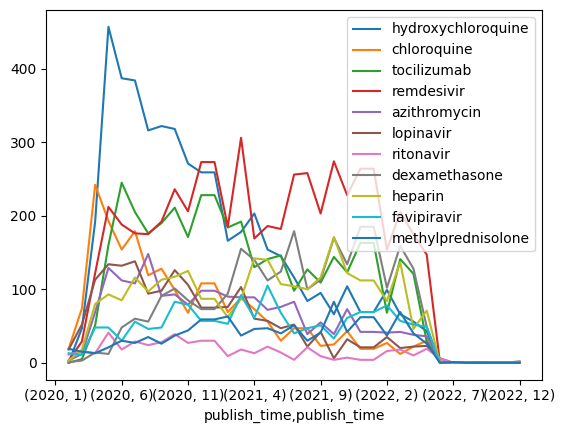

In [169]:
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.loc[(2022,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
dfmt.plot()

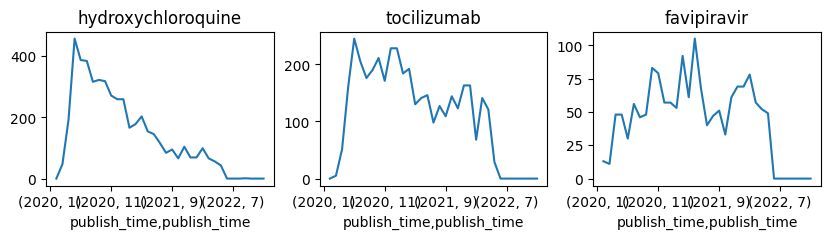

In [170]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']

fig,ax = plt.subplots(1,len(meds),figsize=(10,2))
for i,x in enumerate(meds):
  dfmt[x].plot(ax=ax[i])
  ax[i].set_title(x)

<Axes: xlabel='publish_time,publish_time'>

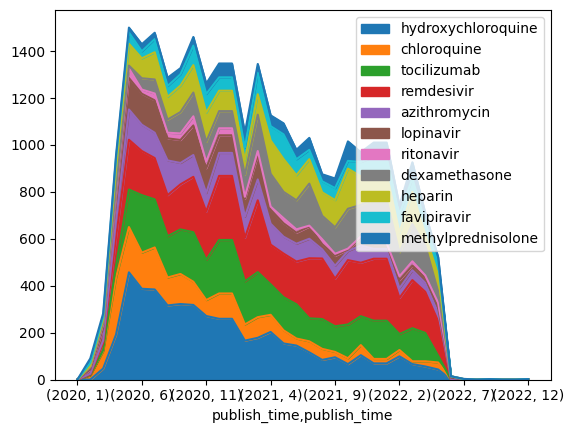

In [171]:
dfmt.plot.area()

<Axes: xlabel='publish_time,publish_time'>

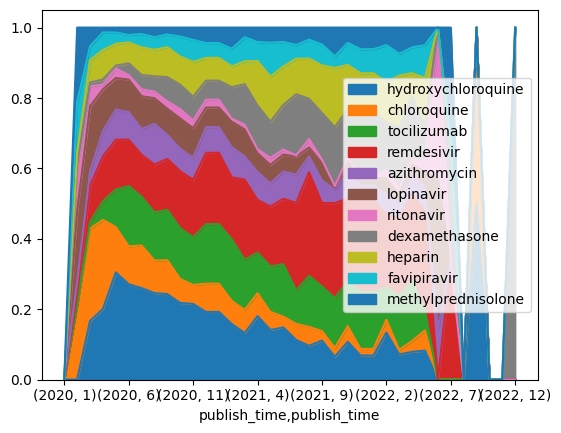

In [175]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()

In [176]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [177]:
m

array([[5470., 2585.,  812., 2381.,  387., 3036., 1081.],
       [2376., 1381.,  258., 1077.,   90., 1555.,  408.],
       [2738., 1007.,  833., 1343.,  236., 1333.,  678.],
       [4284., 2804.,  720., 2076.,  241., 2677.,  817.],
       [2163.,  928.,  476., 1066.,  180., 1032.,  481.],
       [2244., 1239.,  424.,  976.,  122., 1495.,  406.],
       [ 594.,  429.,   87.,  301.,   23.,  409.,  123.],
       [2164.,  919.,  521., 1113.,  180., 1019.,  463.],
       [2035.,  877.,  428.,  999.,  137.,  996.,  365.],
       [1257.,  791.,  250.,  565.,   55.,  804.,  173.],
       [1008.,  476.,  399.,  574.,  100.,  582.,  205.]])

<ipython-input-184-d4a64b7d3d78>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(medications)


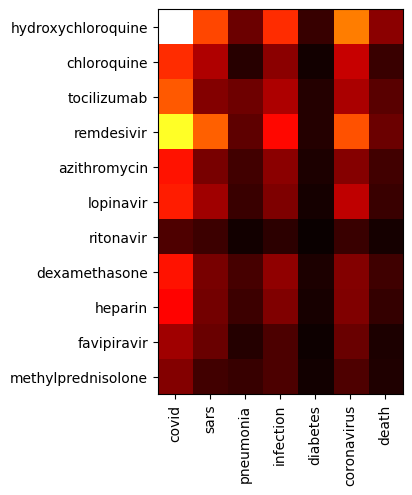

In [184]:
plt.figure(figsize=(15,5))
plt.imshow(m,cmap='hot')
ax = plt.gca()
ax.set_yticklabels(medications)
ax.set_yticks(range(len(medications)))
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

In [185]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

In [187]:
sankey(medications,diagnosis,m,500,h2=[0])

In [ ]:
# 